In [1]:
# Modules to read parquet files
import pyarrow
import fastparquet
import pandas as pd

In [2]:
import pyspark
from pyspark.sql.functions import *

In [3]:
import matplotlib.pyplot as plt

# Loading Pipeline Models

In [4]:
from pyspark.ml import PipelineModel

In [5]:
# Load the model from the GCS path
individual_stars = "gs://yelpfrog/models/review_stars_rf_model.11-15"
individual_stars_model = PipelineModel.load(individual_stars)

In [6]:
# Load the model from the GCS path
business_stars = "gs://yelpfrog/models/review_stars_rf_model.11-25"
business_stars_model = PipelineModel.load(business_stars)

In [7]:
spark = SparkSession.builder.getOrCreate()

In [8]:
folder_path = "gs://yelpfrog/trusted/"

# Model 1

In [9]:
business_review_features = spark.read.parquet(f"{folder_path}business_review_features.parquet/*", engine='pyarrow')

In [10]:
trainingData, testData = business_review_features.randomSplit([0.7, 0.3], seed=42)

In [11]:
test_results = individual_stars_model.transform(testData).select('name','review_stars', 'predicted_stars')

In [12]:
df = test_results.toPandas()

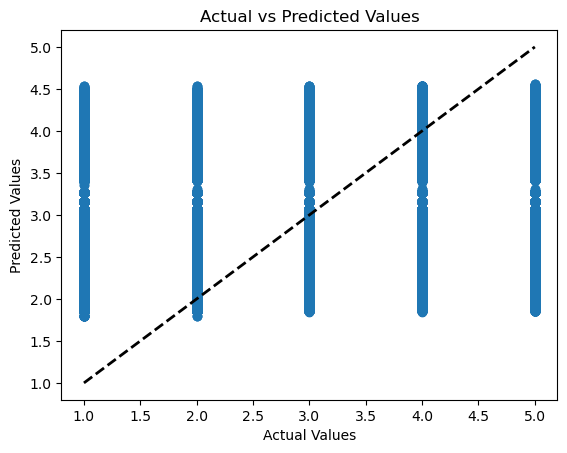

In [13]:
plt.scatter(df['review_stars'], df['predicted_stars'])

# Add a 45-degree line for reference
plt.plot([df['review_stars'].min(), df['review_stars'].max()], 
         [df['review_stars'].min(), df['review_stars'].max()], 'k--', lw=2)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

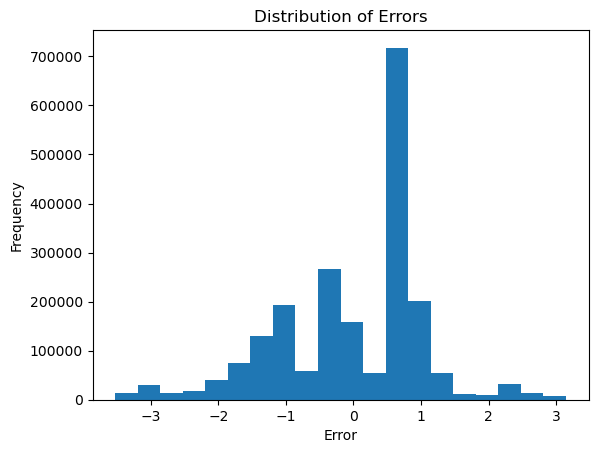

In [14]:
errors = df['review_stars'] - df['predicted_stars']
plt.hist(errors, bins=20)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.show()

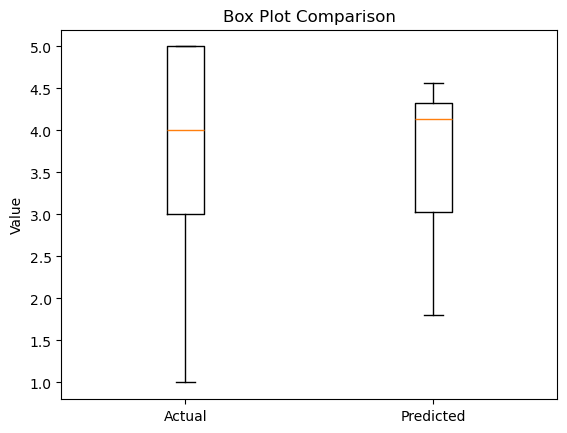

In [15]:
plt.boxplot([df['review_stars'], df['predicted_stars']])
plt.xticks([1, 2], ['Actual', 'Predicted'])
plt.ylabel('Value')
plt.title('Box Plot Comparison')
plt.show()

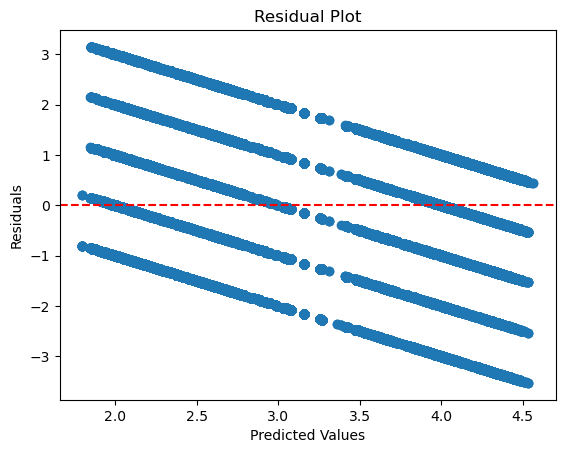

In [16]:
residuals = df['review_stars'] - df['predicted_stars']

plt.scatter(df['predicted_stars'], residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Model 2

In [17]:
from pyspark.sql.functions import col

In [18]:
business_review_features2 = spark.read.parquet(f"{folder_path}business_review_features2.0.parquet/*", engine='pyarrow')

In [19]:
trainingData2, testData2 = business_review_features2.randomSplit([0.7, 0.3], seed=42)

In [20]:
test_results2 = business_stars_model.transform(testData2)

In [21]:
consolidated_results = test_results2.groupBy("name", "business_stars").agg({"predicted_stars": "avg"})
test_results2 = consolidated_results.select('name','business_stars',
                            col("avg(predicted_stars)").alias("predicted_stars"))

In [22]:
df2 = test_results2.toPandas()

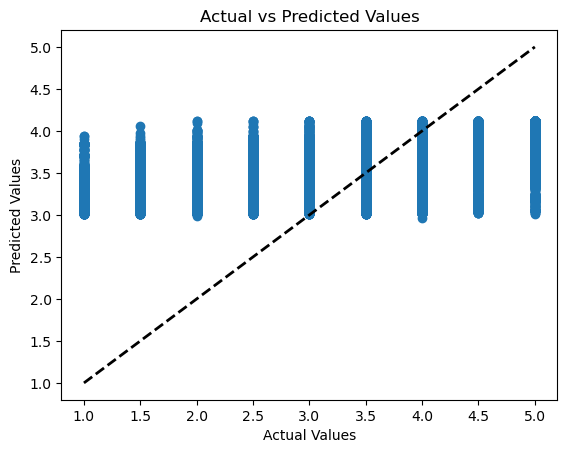

In [23]:
plt.scatter(df2['business_stars'], df2['predicted_stars'])

# Add a 45-degree line for reference
plt.plot([df2['business_stars'].min(), df2['business_stars'].max()], 
         [df2['business_stars'].min(), df2['business_stars'].max()], 'k--', lw=2)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

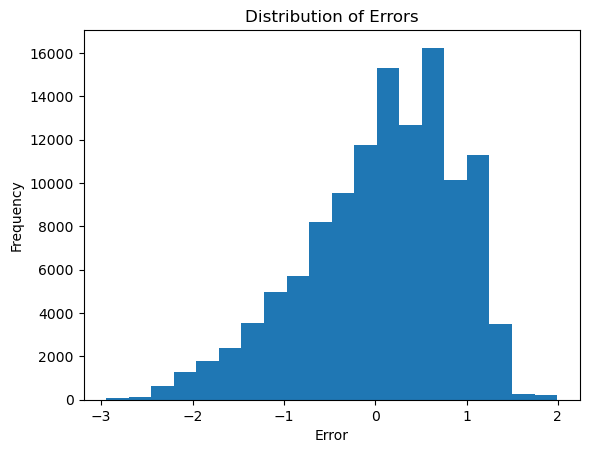

In [24]:
errors = df2['business_stars'] - df2['predicted_stars']
plt.hist(errors, bins=20)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.show()

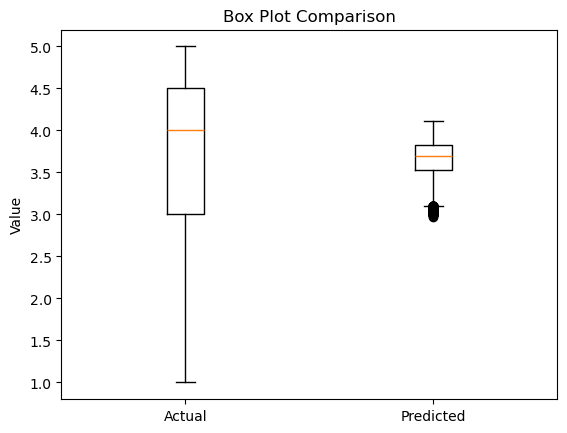

In [25]:
plt.boxplot([df2['business_stars'], df2['predicted_stars']])
plt.xticks([1, 2], ['Actual', 'Predicted'])
plt.ylabel('Value')
plt.title('Box Plot Comparison')
plt.show()

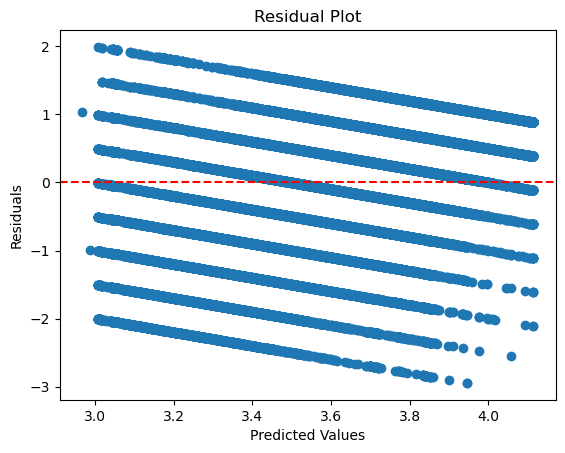

In [26]:
residuals = df2['business_stars'] - df2['predicted_stars']

plt.scatter(df2['predicted_stars'], residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Model 3 (Model 2 But Better)

In [27]:
#Adds Random Forest Regressor hyperparameters

In [28]:
business_review_features3 = spark.read.parquet(f"{folder_path}business_review_features2.01.parquet/*", engine='pyarrow')

In [29]:
trainingData3, testData3 = business_review_features3.randomSplit([0.7, 0.3], seed=42)

In [30]:
test_results3 = business_stars_model.transform(testData3)

In [31]:
consolidated_results = test_results3.groupBy("name", "business_stars").agg({"predicted_stars": "avg"})
test_results3 = consolidated_results.select('name','business_stars',
                            col("avg(predicted_stars)").alias("predicted_stars"))

In [32]:
df3 = test_results3.toPandas()

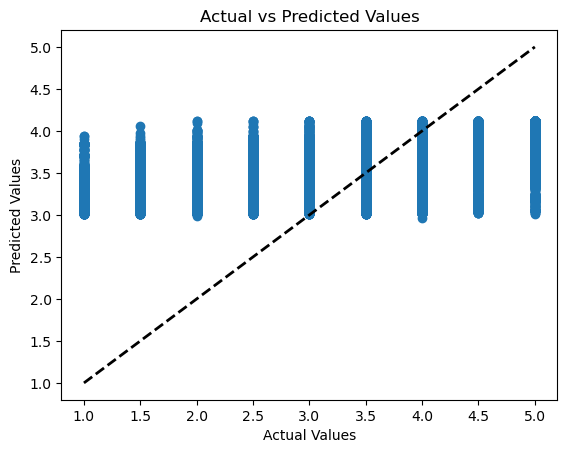

In [33]:
plt.scatter(df3['business_stars'], df3['predicted_stars'])

# Add a 45-degree line for reference
plt.plot([df3['business_stars'].min(), df3['business_stars'].max()], 
         [df3['business_stars'].min(), df3['business_stars'].max()], 'k--', lw=2)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

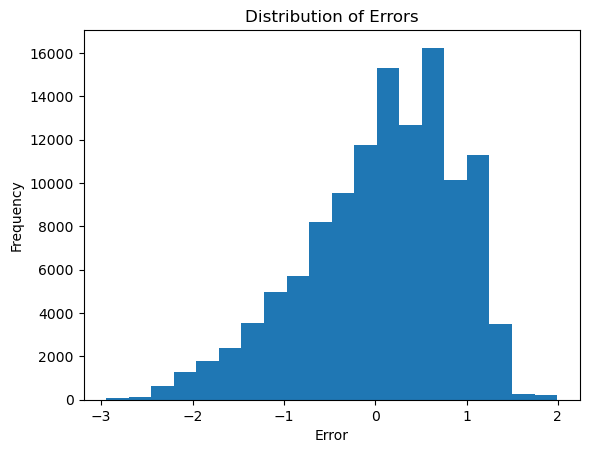

In [34]:
errors = df3['business_stars'] - df3['predicted_stars']
plt.hist(errors, bins=20)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.show()

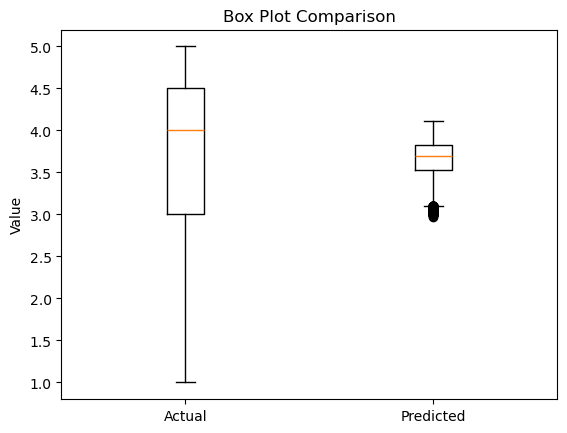

In [35]:
plt.boxplot([df3['business_stars'], df3['predicted_stars']])
plt.xticks([1, 2], ['Actual', 'Predicted'])
plt.ylabel('Value')
plt.title('Box Plot Comparison')
plt.show()

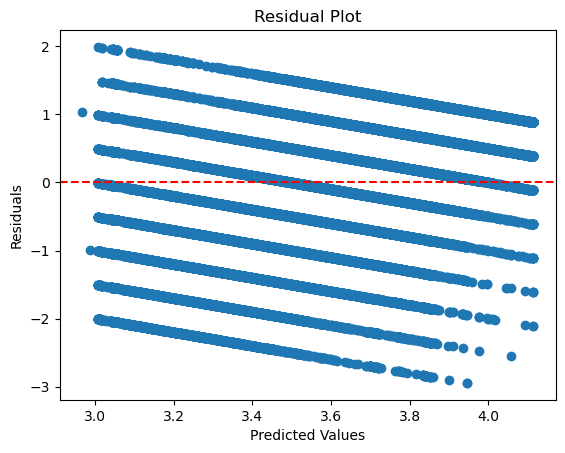

In [36]:
residuals = df3['business_stars'] - df3['predicted_stars']

plt.scatter(df3['predicted_stars'], residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()